In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 2: Load the Heart Disease dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load data into DataFrame
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, header=None, names=columns)

# Replace missing values denoted by "?" with NaN and drop rows with NaN
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert columns with numeric values stored as strings to float
df = df.astype(float)


In [ ]:
# Step 3: Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Convert target to binary classification (0: No heart disease, 1: Heart disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Evaluate the model
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.84
Recall: 0.88
F1 Score: 0.86


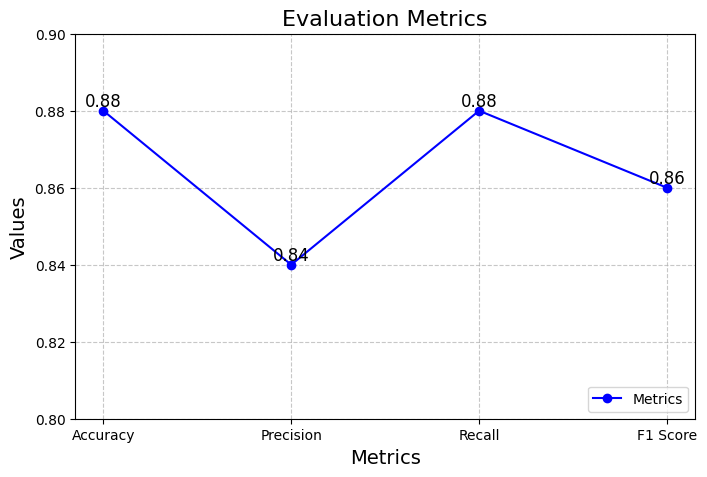

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [0.88, 0.84, 0.88, 0.86]

# Create the line graph
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-', color='blue', label="Metrics")

# Add title and labels
plt.title("Evaluation Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Set y-axis limits to highlight differences between metrics
plt.ylim(0.8, 0.9)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Add annotations for exact values
for i, value in enumerate(values):
    plt.text(metrics[i], value, f"{value:.2f}", fontsize=12, ha='center', va='bottom')

# Show legend and display the plot
plt.legend(["Metrics"], loc="lower right")
plt.show()


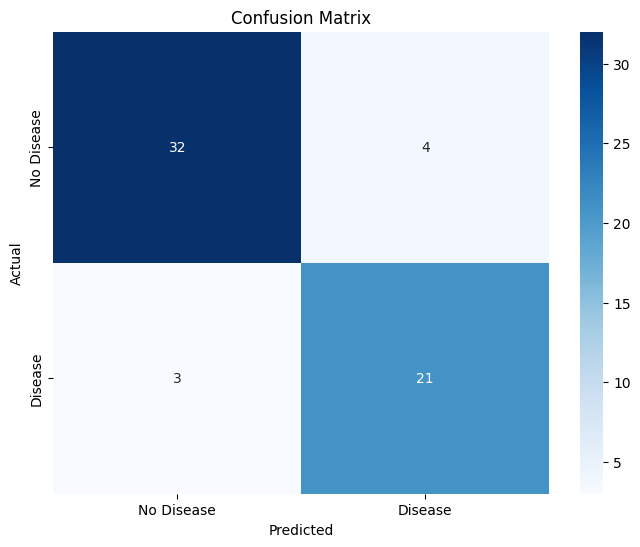

In [ ]:
# Step 6: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()